In [19]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

font_path = '/System/Library/Fonts/STHeiti Medium.ttc'
font = FontProperties(fname=font_path).get_name()
import seaborn as sn
from pandas.plotting import scatter_matrix
plt.rcParams['font.sans-serif'] = ['Heiti TC']  
plt.rcParams['axes.unicode_minus'] = False    


In [13]:
df = pd.read_csv('data/attributes.csv')

In [22]:
df.head()

,perfume_id,item_name,brand,theme,note,perfumer,gender,tags,url
0,889072,"挪威心情 Moods Of Norway Disco Sunset Pour Homme, ...",挪威心情,辛辣芳香调,"薄荷,苹果,粉红胡椒,肉桂,葡萄,麝香,零陵香豆,雪松",NaN,NaN,"水果,绿叶,麝香,甜",https://www.nosetime.com/889072-
1,161998,"K 混合魔术 哈亚特 Kemi Blending Magic Hayat, 2014",K 混合魔术,辛辣木质调,"苦橙,薰衣草,藏红花,小豆蔻,琥珀,肉桂,沉香(乌木),雪松,莎草,广藿香",Chris Maurice,NaN,"木质,温暖辛辣,沉香,泥土",https://www.nosetime.com/161998-
2,245968,"梅尔 Mair Acqua Di Lusso, 2024",梅尔,水生花香调,"香柠檬,柠檬,小豆蔻,橙花,栀子花,茉莉,椰子,檀香木,香草",NaN,NaN,"白花,柑橘,甜",https://www.nosetime.com/245968-
3,335908,菲奥雷 In Fiore Kashmir,菲奥雷,芳香木质调,"广藿香,橙花油,檀香木",Julie Elliott,NaN,"木质,广藿香,温暖辛辣,树脂",https://www.nosetime.com/335908-
4,146612,"Khadlaj Perfumes Khadlaj Perfumes Nuha, 2023",Khadlaj Perfumes,NaN,"椰子,苹果,天芥菜,茉莉,玫瑰,香草,檀香木,开司米酮,天芥菜,茉莉,玫瑰,香草,檀香木,开...",NaN,NaN,"香草,脂粉,椰子,木质",https://www.nosetime.com/146612-


<Axes: title={'center': 'Top Themes'}, ylabel='theme'>

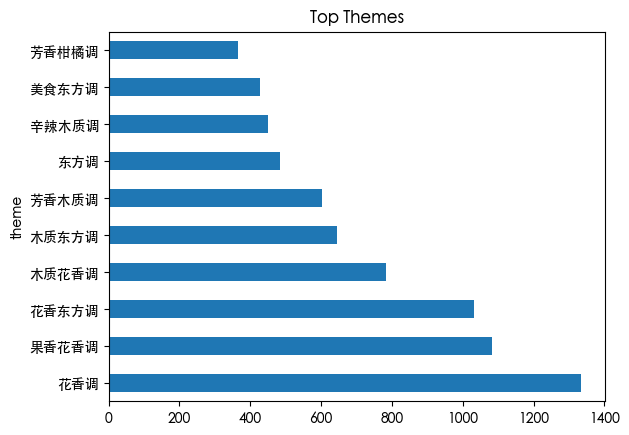

In [23]:
df['theme'].value_counts().head(10).plot(kind='barh', title='Top Themes')

In [24]:
from collections import Counter

all_notes = []
df['note'].dropna().apply(lambda x: all_notes.extend(x.split(',')))
Counter(all_notes).most_common(10)


[('麝香', 7531),
 ('香草', 5168),
 ('琥珀', 5035),
 ('檀香木', 4880),
 ('广藿香', 4726),
 ('茉莉', 4496),
 ('玫瑰', 4400),
 ('雪松', 4272),
 ('香柠檬', 4167),
 ('香根草', 2806)]

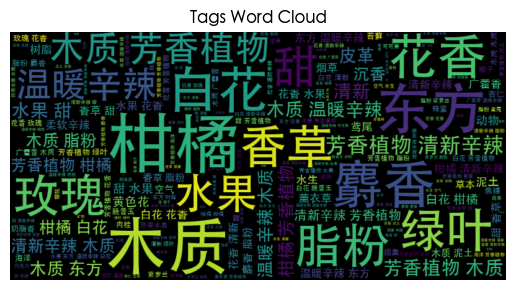

In [27]:
from wordcloud import WordCloud
tags = ','.join(df['tags'].dropna())
wordcloud = WordCloud(font_path=font_path, width=800, height=400).generate(tags)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Tags Word Cloud")
plt.show()
